In [1]:
#Import Libraries 
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns

In [2]:
#Read parquet files from local machine as data frames 

# Load Data Frames From Local Machine 


## MPL Soccer Package

In [37]:
from mplsoccer.pitch import Pitch

Using mpl to draw a soccer pitch

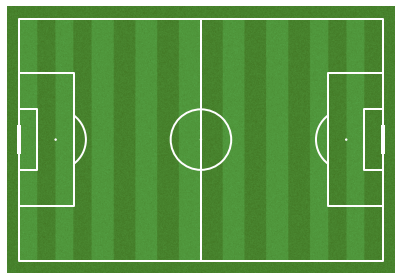

In [38]:
# Adding to the Pitch() function we can get a more detailed visial
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

## Ploting Shot Locations

We can now plot the location of match events over this background. <br>
Match id 70220 between Barcelona and Osasuna contained a lot of shot events so lets plot the shot and thus goal locations for that game

In [39]:
df = event[(event.match_id==70220)&(event.type_id ==16)].reset_index(drop=True)
len(df)

24

we have 24 shot locations to plot

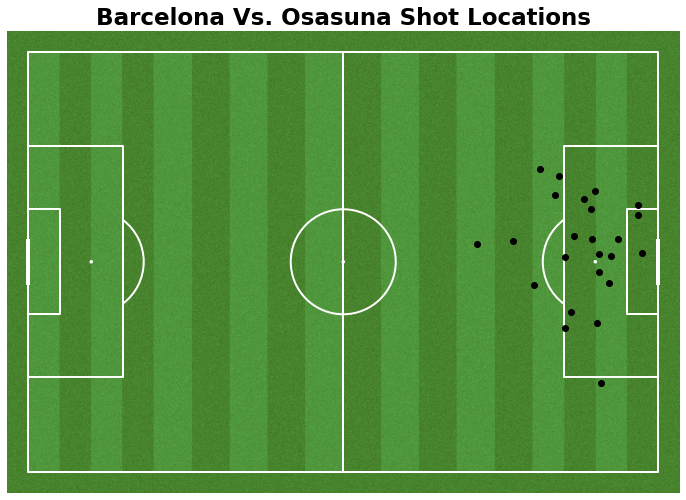

In [42]:
fig, ax = plt.subplots(figsize=(13,8.5))

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

pitch.draw(ax=ax)

plt.scatter(df['x'],df['y'],c='black')
plt.title('Barcelona Vs. Osasuna Shot Locations',fontsize=23,fontweight="bold")
#plt.savefig('70220shots1.png', dpi=300)

### Color coding outcome

Let do the plot again but color the shots resulting in a miss black and a goal as red <br>
We can also label the scatter points with the team name that took the shot


Text(0.5, 1.0, 'Barcelona Vs. Osasuna Shots (Miss and Goal Locations)')

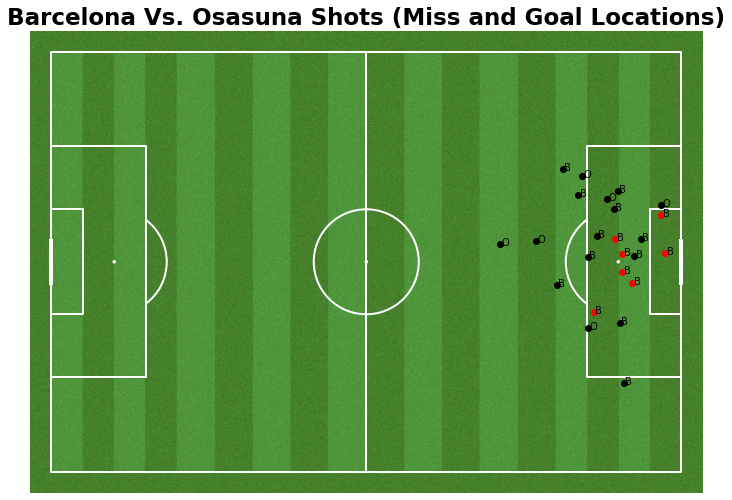

In [47]:
fig, ax = plt.subplots(figsize=(13,8.5))

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

pitch.draw(ax=ax)

for i in range(df.shape[0]):
 plt.text(x=df.x[i]+0.3,y=df.y[i]+0.3,s=df.team_name[i][0],fontdict=dict(color='black', alpha=1, size=10))

#loop over the data set ploting goals as red and not goals as black
for row in range(len(df)):
    if df['outcome_name'][row] == 'Goal':
        plt.scatter(df['x'][row],df['y'][row],color='red')
    else:
        plt.scatter(df['x'][row],df['y'][row],color='black')
        
plt.title('Barcelona Vs. Osasuna Shots (Miss and Goal Locations)',fontsize=23,fontweight="bold")
#plt.savefig('70220shots2.png', dpi=300)

see that barcelona took far more shots than Osasuna and also that the goal all came from similar positions. Inside the box and bnot from a wide angle relative to the goal. 

## Barcelona All Shot Locations

In [44]:
df_shots = event[(event.type_name == 'Shot') & (event.team_name == 'Barcelona')].reset_index(drop=True)
df_goals = event[(event.type_name == 'Shot') & (event.team_name == 'Barcelona') & (event.outcome_name == 'Goal')].reset_index(drop=True)

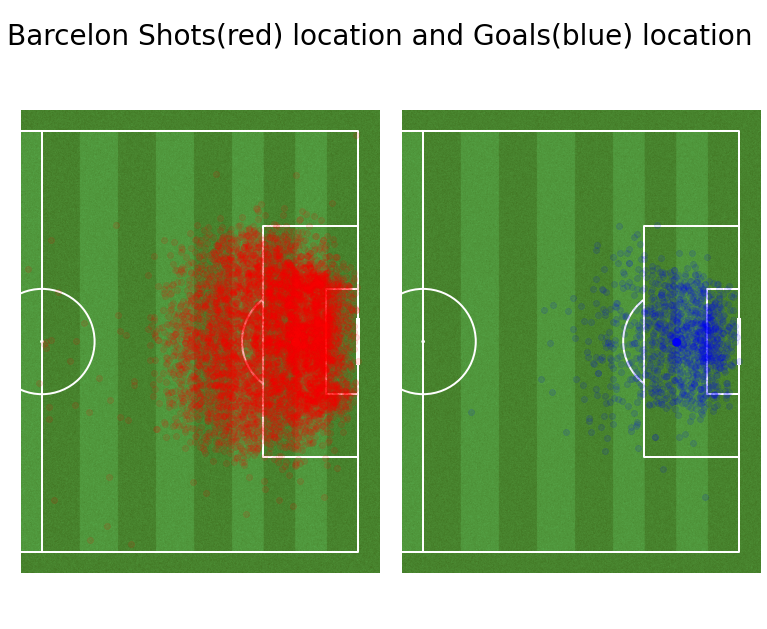

In [48]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True,half=True)

fig, axs = pitch.grid(ncols=2, axis=False)

plt_shots = pitch.scatter(df_shots['x'],df_shots['y'],c='red',alpha=0.1,ax=axs['pitch'][0])
plt_goals = pitch.scatter(df_goals['x'],df_goals['y'],c='blue',alpha=0.1,ax=axs['pitch'][1])

title = 'Barcelon Shots(red) location and Goals(blue) location'
title1_text = axs['title'].text(0.5, 0.7, title,fontsize=28,ha='center', va='center')
#plt.savefig('BarcelonaShotGoalLoc.png', dpi=300)

## Barcelona All Shot Locations Heat Map

C:\Users\jhorgan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jhorgan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


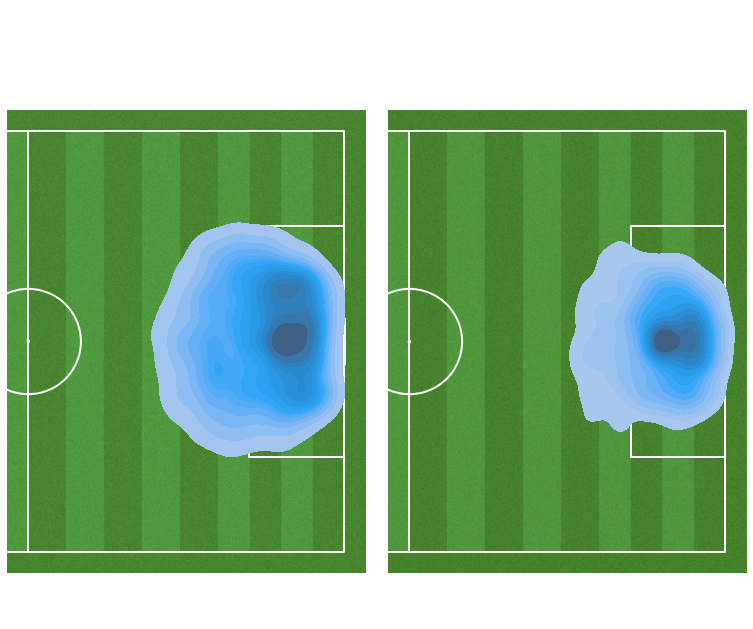

In [49]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True,half=True)

fig, axs = pitch.grid(ncols=2, axis=False)

plt_shots = sns.kdeplot(df_shots['x'],df_shots['y'],shade=True,shade_lowest=False,n_levels=15,ax=axs['pitch'][0])
plt_goals = sns.kdeplot(df_goals['x'],df_goals['y'],shade=True,shade_lowest=False,n_levels=15,ax=axs['pitch'][1])
#plt.savefig('BarcelonaShotGoalLocHM.png', dpi=300)

## Voronoi Diagrams

 Voronoi diagram is a partition of a plane into regions close to each of a given set of objects. In our case we can use player position data from the freeze table and team id to divide the pitch into 'Zones of Control'. This can be used to see what team was in 'contol' of certain portion of the pitch during an event

In [50]:
#make df of the event data for goals in match 
df = event[(event.match_id==70220)& (event.outcome_name == 'Goal')].reset_index(drop=True)
df.head()

match_id                                    id  index  period  \
0     70220  dc8d7b2e-63db-40c1-81d4-e36958199625    227       1   
1     70220  fa5ec902-893d-414c-9fa9-1bd52a6b049b    618       1   
2     70220  24c8414f-52a3-4649-ab44-ef249b17be5d   1552       1   
3     70220  4d1822cf-9585-4a59-9915-618b7049d173   1789       1   
4     70220  b2e11cfa-0e53-444d-8bdc-2564f21da887   2521       2   

   timestamp_minute  timestamp_second  timestamp_millisecond  minute  second  \
0                 4                16                    874       4      16   
1                12                34                    633      12      34   
2                33                15                    742      33      15   
3                40                26                    800      40      26   
4                11                34                    374      56      34   

   type_id  ... block_save_block  out shot_open_goal  \
0       16  ...             None  NaN           True   
1       16  ...             None  NaN           None   
2       16  ...             None  NaN           None   
3       16  ...             None  NaN           None   
4       16  ...             None  NaN           None   

   injury_stoppage_in_chain shot_follows_dribble  pass_no_touch  \
0                      None                 None           None   
1                      None                 None           None   
2                      None                 None           None   
3                      None                 None           None   
4                      None                 None           None   

  dribble_no_touch  half_start_late_video_start  player_off_permanent  \
0             None                         None                  None   
1             None                         None                  None   
2             None                         None                  None   
3             None                         None                  None   
4             None                         None                  None   

  half_end_early_video_end  
0                     None  
1                     None  
2                     None  
3                     None  
4                     None  

[5 rows x 95 columns]

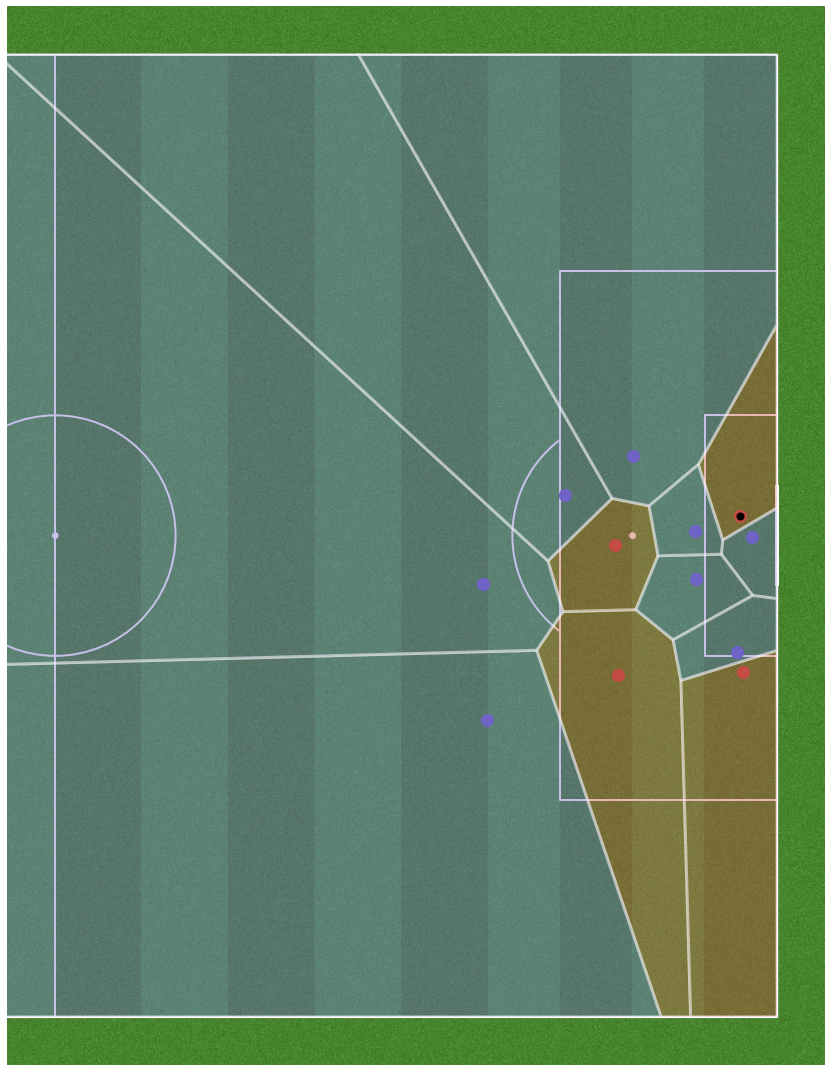

In [51]:
#Event ID
event_id = 'dc8d7b2e-63db-40c1-81d4-e36958199625'

#Freeze Table
dffreeze= freeze[['id','player_teammate','player_name','x','y']]
dffreeze = dffreeze[dffreeze['id']==event_id]

#Event Table
dfevent = event[['id','match_id','type_id','type_name','outcome_id','outcome_name','x','y','team_name']]
dfevent = dfevent[dfevent['id']==event_id]

# Need to concatenate event position with associated freeze positions 
x = np.concatenate([dfevent.x.values,dffreeze.x.values])
y = np.concatenate([dfevent.y.values,dffreeze.y.values])
teams = np.concatenate([[True], dffreeze.player_teammate.values])

#Plot Pitch
pitch = Pitch(half=True, pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(15, 15))

# Plot Voronoi
team1, team2 = pitch.voronoi(x, y, teams)
t1 = pitch.polygon(team1, ax=ax, fc='#c34c45', ec='white', lw=3, alpha=0.4)
t2 = pitch.polygon(team2, ax=ax, fc='#6f63c5', ec='white', lw=3, alpha=0.4)

# Plot players with black spot for player in possesion 
sc1 = pitch.scatter(x[teams], y[teams], ax=ax, c='#c34c45', s=150)
sc2 = pitch.scatter(x[~teams], y[~teams], ax=ax, c='#6f63c5', s=150)
sc2 = pitch.scatter(dfevent['x'], dfevent['y'], ax=ax, c='black', s=50)

#plt.savefig('BarcelonaVoroni.png', dpi=300)

## Convex Hull's

A convex hull will draw the boundries of the points in a plot.<br> We can use this to see the areas in which a player was active for a defined subset of events 


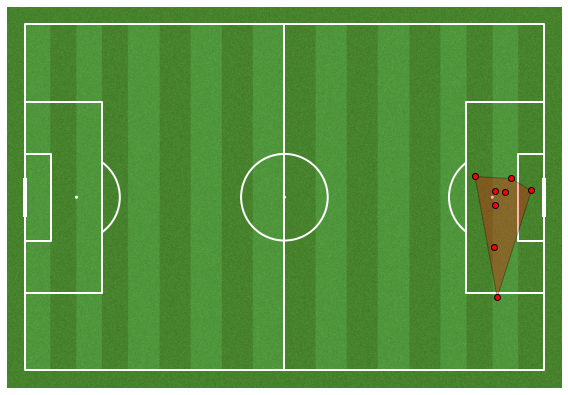

In [52]:
#Filter Columns
df = event[['match_id','type_id','type_name','outcome_id','outcome_name',
       'x','y','team_name','player_name']]

#Looking at the shots made by Messi in match 70220
df=df[(df.type_name == 'Shot')&(df.match_id == 70220)&(df.player_name == 'Lionel Andrés Messi Cuccittini')]

df=df.reset_index(drop=True)

pitch = Pitch(pitch_color='grass',line_color='white',stripe=True)
fig, ax = pitch.draw(figsize=(8, 6))
hull = pitch.convexhull(df.x, df.y)
poly = pitch.polygon(hull, ax=ax, edgecolor='black', facecolor='red', alpha=0.3)
scatter = pitch.scatter(df.x, df.y, ax=ax, edgecolor='black', facecolor='red')

#plt.savefig('MessiShotsCH.png', dpi=300)
plt.show()

Can see that almost all of Messi's shots came from inside the box and directly infront of the goal.

### Comparing the convex hull of two players 

Plotting the convex Hulls for Messi and Dani Alves in all events from game 70220

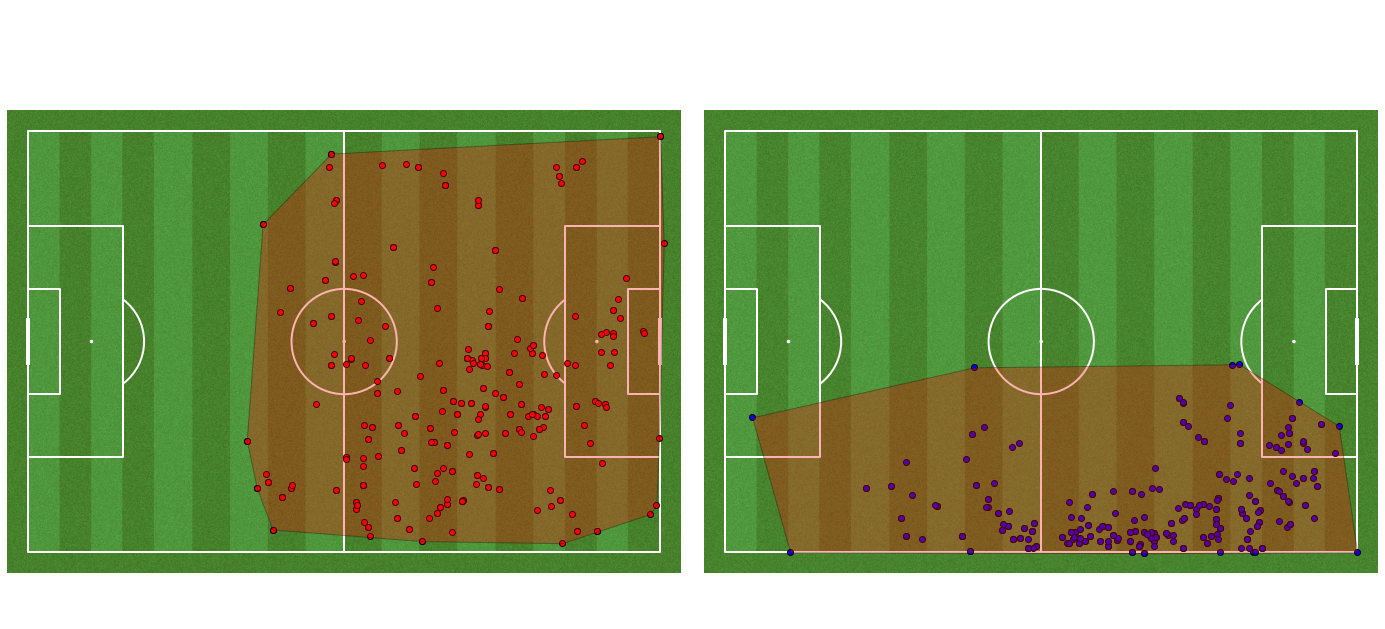

In [56]:
#Filter Columns
df = event[['match_id','type_id','type_name','outcome_id','outcome_name',
       'x','y','team_name','player_name']]


#filter events by our match_id player and event
df_m=df[(df.match_id == 70220)&(df.player_name == 'Lionel Andrés Messi Cuccittini')].reset_index(drop=True)
df_a=df[(df.match_id == 70220)&(df.player_name == 'Daniel Alves da Silva')].reset_index(drop=True)

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

fig, axs = pitch.grid(ncols=2, axis=False)
hull_m = pitch.convexhull(df_m.x, df_m.y)
hull_a = pitch.convexhull(df_a.x, df_a.y)

plt_shots = pitch.scatter(df_m['x'],df_m['y'],c='red',edgecolor='black',ax=axs['pitch'][0])
poly = pitch.polygon(hull_m, ax=axs['pitch'][0], edgecolor='black', facecolor='red', alpha=0.3)
plt_goals = pitch.scatter(df_a['x'],df_a['y'],c='blue',edgecolor='black',ax=axs['pitch'][1])
poly = pitch.polygon(hull_a, ax=axs['pitch'][1], edgecolor='black', facecolor='red', alpha=0.3)

#plt.savefig('MessiAlvesCH.png', dpi=300)

Looking at Messi's Convex hull of all events ing game 70220 we can see that he does not stick to one position but instead players quite freely across the width of the pitch. Whereas Daini Alves Stuck to his position in the right wing of the field. 

let now compare Dani Alves's plot to a game in which barelana lost. use match id 266467 where Barca lost 4-1 to Celta Vigo

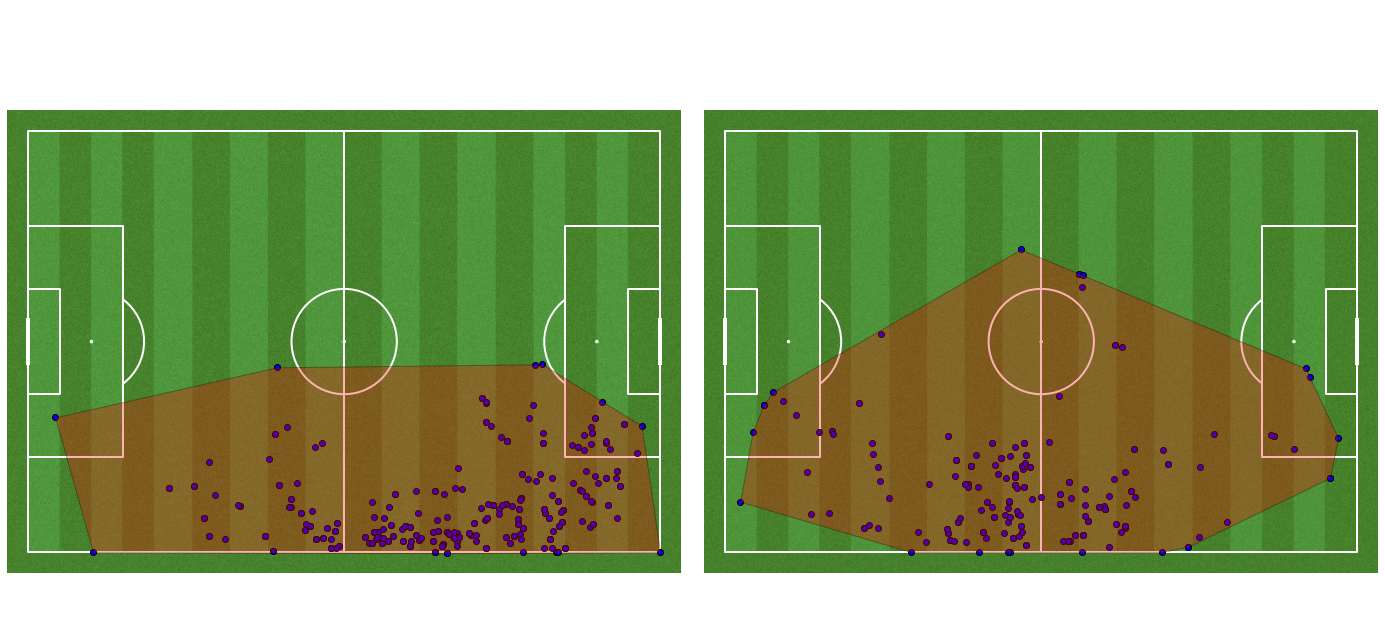

In [58]:
#Filter Columns
df = event[['match_id','type_id','type_name','outcome_id','outcome_name',
       'x','y','team_name','player_name']]

#filter events by our match_id player and event
df_1=df[(df.match_id == 70220)&(df.player_name == 'Daniel Alves da Silva')].reset_index(drop=True)
df_2=df[(df.match_id == 266467)&(df.player_name == 'Daniel Alves da Silva')].reset_index(drop=True)

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

fig, axs = pitch.grid(ncols=2, axis=False)
hull_1 = pitch.convexhull(df_1.x, df_1.y)
hull_2 = pitch.convexhull(df_2.x, df_2.y)

plt_shots = pitch.scatter(df_1['x'],df_1['y'],c='blue',edgecolor='black',ax=axs['pitch'][0])
poly = pitch.polygon(hull_1, ax=axs['pitch'][0], edgecolor='black', facecolor='red', alpha=0.3)
plt_goals = pitch.scatter(df_2['x'],df_2['y'],c='blue', edgecolor='black',ax=axs['pitch'][1])
poly = pitch.polygon(hull_2, ax=axs['pitch'][1], edgecolor='black', facecolor='red', alpha=0.3)

#plt.savefig('AlvesAlvesCH.png', dpi=300)

Can see Alves playeed a much more defensive game against Celta with far more events in his own half and a few in his own box

# Pass Maps

In [59]:
#Create a data fram of all Barcelona passes in game 70220
df = event[['match_id','period','type_id','type_name','outcome_id','outcome_name',
       'x','y','end_x', 'end_y','team_name','minute']]
#Filter for game 70220, Barcelona and event type
df = df[(df.match_id == 70220) & (df.type_name == 'Pass') & (df.team_name == 'Barcelona')].reset_index(drop=True)

#now create 4 frames for successful and unsuccessful passes for each half

df_1 = df[df.period == 1]
df_2 = df[df.period == 2]

df_1_successful = df_1[df_1.outcome_name.isnull()]
df_1_unsuccessful = df_1[df_1.outcome_name.notnull()]

df_2_successful = df_2[df_2.outcome_name.isnull()]
df_2_unsuccessful = df_2[df_2.outcome_name.notnull()]

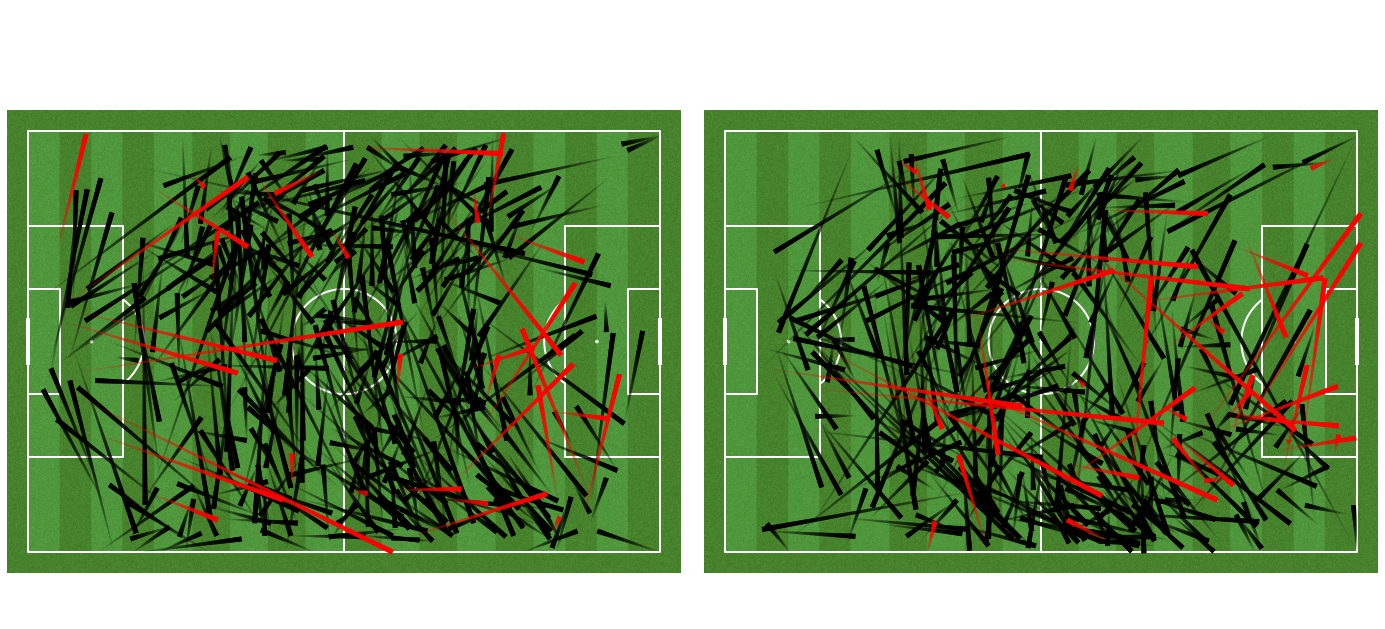

In [60]:

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, axs = pitch.grid(ncols=2, axis=False)

passes_complete_1 = pitch.lines(df_1_successful.x, df_1_successful.y,
                  df_1_successful.end_x, df_1_successful.end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='black', ax=axs['pitch'][0])
passes_incomplete_1 = pitch.lines(df_1_unsuccessful.x, df_1_unsuccessful.y,
                  df_1_unsuccessful.end_x, df_1_unsuccessful.end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='red', ax=axs['pitch'][0])

passes_complete_2 = pitch.lines(df_2_successful.x, df_2_successful.y,
                  df_2_successful.end_x, df_2_successful.end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='black', ax=axs['pitch'][1])
passes_incomplete_2 = pitch.lines(df_2_unsuccessful.x, df_2_unsuccessful.y,
                  df_2_unsuccessful.end_x, df_2_unsuccessful.end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='red', ax=axs['pitch'][1])

#plt.savefig('passmap.png', dpi=300)

# Pass Networks

pass network following the methonf from mpl soccer<br> 'https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_pass_network.html#sphx-glr-gallery-pitch-plots-plot-pass-network-py'

first choose to plot pass network of the initial formation for both sides in game 70220

In [61]:
# Set up our DF for the match
events = event[(event.match_id == 70220)]
players = tactic[tactic.match_id == 70220]

#Adding on the last tactics id and formation for the team for each event
events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']
events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()

#Add the abbreviated player position to the players dataframe

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.player_position_id.map(formation_dict)

#Add on the subsitutions to the players dataframe, i.e. where players are subbed on but the formation doesn’t change

sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]


# add on the position the player was playing in the formation to the events dataframe
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

events.groupby('team_name').tactics_formation.unique()

C:\Users\jhorgan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
C:\Users\jhorgan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\jhorgan\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

team_name
Barcelona           [41212.0]
Osasuna      [4231.0, 4141.0]
Name: tactics_formation, dtype: object

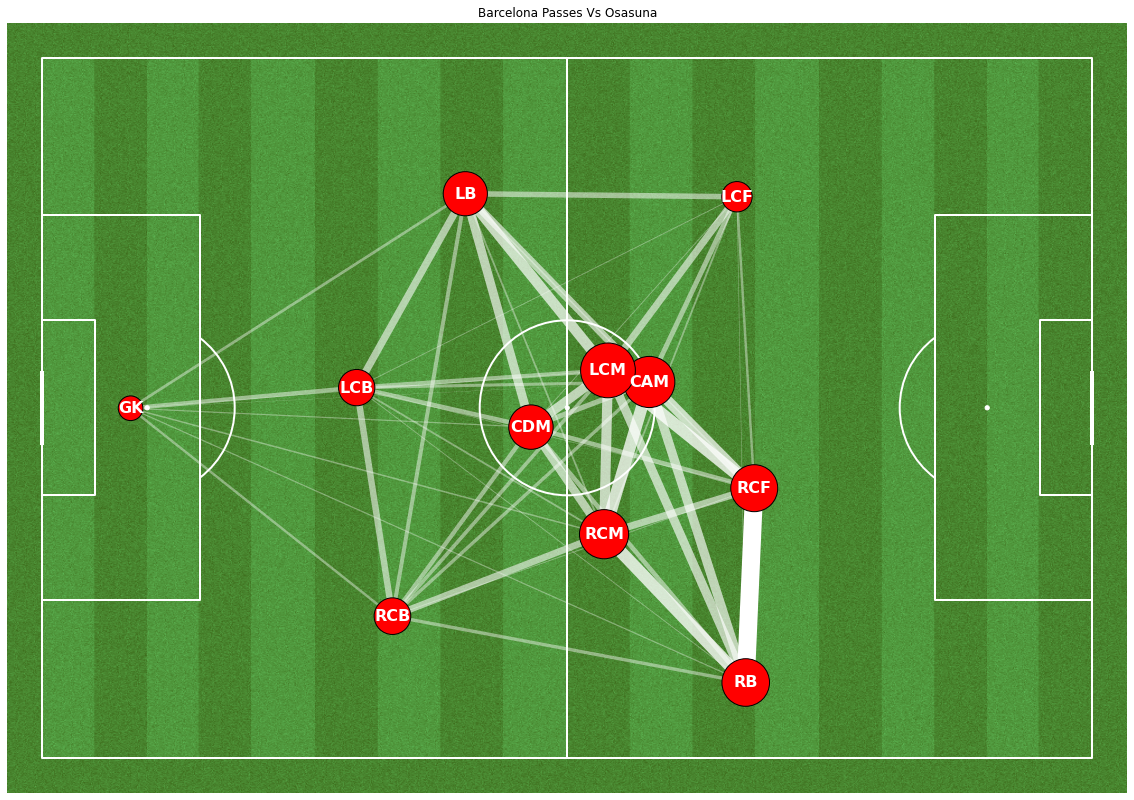

In [63]:
# Filter passes by chosen formation and team, then group all passes and receipts to 
#calculate avg x, avg y, count of events for each slot in the formation
FORMATION = 41212
TEAM = 'Barcelona'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

# average locations
average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

# calculate the number of passes between each position (using min/ max so we get passes both ways)
passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

# add on the location of each player so we have the start and end positions of the lines
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

#Calculate the line width and marker sizes relative to the largest counts

MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

# Set color to make the lines more transparent when fewer passes are made

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

#Plotting

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)
    
plt.title("Barcelona Passes Vs Osasuna")

#plt.savefig('passnetwork.png', dpi=300)

In [ ]:
# Filter passes by chosen formation and team, then group all passes and receipts to 
#calculate avg x, avg y, count of events for each slot in the formation
FORMATION = 4231
TEAM = 'Osasuna'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

# average locations
average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

# calculate the number of passes between each position (using min/ max so we get passes both ways)
passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

# add on the location of each player so we have the start and end positions of the lines
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

#Calculate the line width and marker sizes relative to the largest counts

MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

# Set color to make the lines more transparent when fewer passes are made

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

#Plotting

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)
    
plt.title("Osasunas Vs Barcelona")

# Pizza Plots

here we will use a pizza plot to visualise player rankings in certain catagories. we we use the clustering features data set for this a link to its creation can be found here '' 

In [65]:
# Load Data Frames From Local Machine 
location_features  = r"C:\Users\jhorgan\OneDrive - pmOne AG\Desktop\Stats_bomb_data\dim_tables\PlayerFeaturesRanked.parquet"
features = pd.read_parquet(location_features, engine = 'auto')


In [66]:
#import the pizza plot library
from mplsoccer import PyPizza

In [67]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [68]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

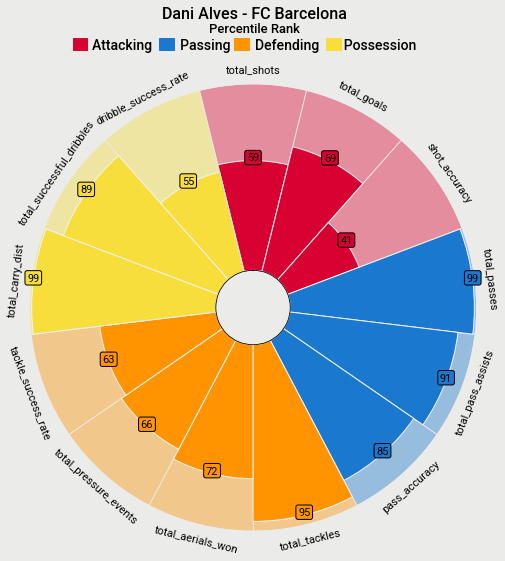

In [72]:
# filter for Alves
features_a = features[features.player_name == 'Daniel Alves da Silva'].reset_index(drop=True)

# parameter list
params = features_a.columns.tolist()
params = params[1:14]

# value list
values = features_a.loc[0, :].values.tolist()
values = values [1:14]

# color for the slices and text
slice_colors = ["#D70232"] * 3 + ["#1a78cf"] * 3 + ["#ff9300"] * 4 +["#f7de3a"] * 3
text_colors = ["#000000"] * 13

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Dani Alves - FC Barcelona", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)


# add text
fig.text(
    0.515, 0.925, "Attacking        Passing       Defending       Possession", size=14,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.2, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.35, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.48, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.64, 0.9225), 0.025, 0.021, fill=True, color="#F7DE3A",
        transform=fig.transFigure, figure=fig
    ),
])

#plt.savefig('DaniAlvesPizza.png', dpi=300)
plt.show()

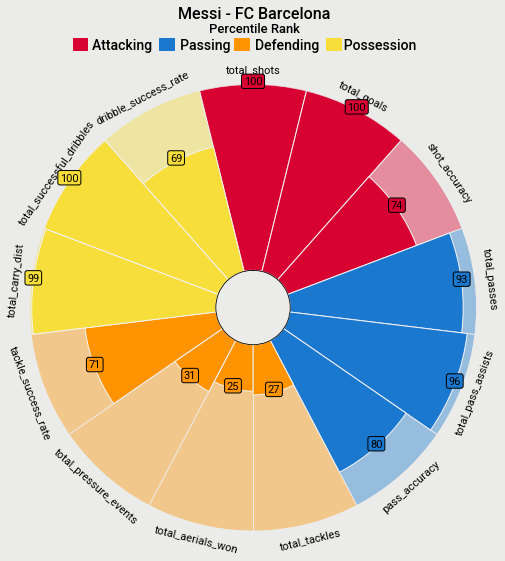

In [71]:
# filter for Messi
features_m = features[features.player_name == 'Lionel Andrés Messi Cuccittini'].reset_index(drop=True)

# parameter list
params = features_m.columns.tolist()
params = params[1:14]

# value list
values = features_m.loc[0, :].values.tolist()
values = values [1:14]

# color for the slices and text
slice_colors = ["#D70232"] * 3 + ["#1a78cf"] * 3 + ["#ff9300"] * 4 +["#f7de3a"] * 3
text_colors = ["#000000"] * 13

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Messi - FC Barcelona", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)


# add text
fig.text(
    0.515, 0.925, "Attacking        Passing       Defending       Possession", size=14,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.2, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.35, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.48, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.64, 0.9225), 0.025, 0.021, fill=True, color="#F7DE3A",
        transform=fig.transFigure, figure=fig
    ),
])

#plt.savefig('MessiPizza.png', dpi=300)
plt.show()